<a href="https://colab.research.google.com/github/jithesh9539/Clustering_Machine_Learning/blob/main/Mall_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data1=data.iloc[:,[3,4]].values

In [8]:
data1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
from sklearn.cluster import KMeans
wcss=[]    #Within cluster sum of squares, distance bw each point and centroid.WCSS value is more wen wcss is 1


In [11]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(data1)
  wcss.append(kmeans.inertia_)

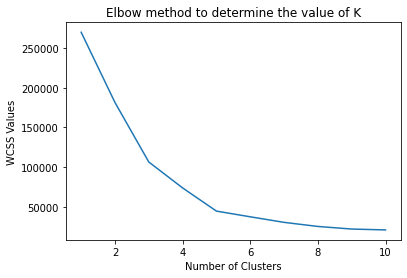

In [12]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method to determine the value of K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [13]:
model=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [14]:
y=model.fit_predict(data1)

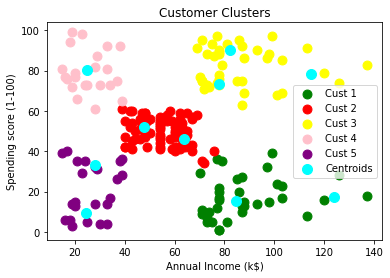

In [17]:
plt.scatter(data1[y==0,0],data1[y==0,1],s=80,c="green",label='Cust 1')
plt.scatter(data1[y==1,0],data1[y==1,1],s=80,c="red",label='Cust 2')
plt.scatter(data1[y==2,0],data1[y==2,1],s=80,c="yellow",label='Cust 3')
plt.scatter(data1[y==3,0],data1[y==3,1],s=80,c="pink",label='Cust 4')
plt.scatter(data1[y==4,0],data1[y==4,1],s=80,c="purple",label='Cust 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()


In [18]:
import scipy.cluster.hierarchy as sch

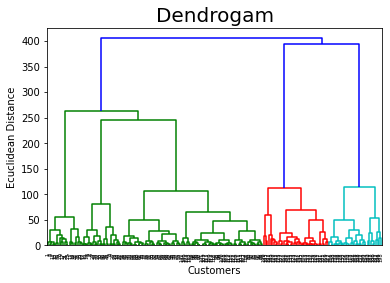

In [20]:
dendrogram = sch.dendrogram(sch.linkage(data1, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data1)

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data1)

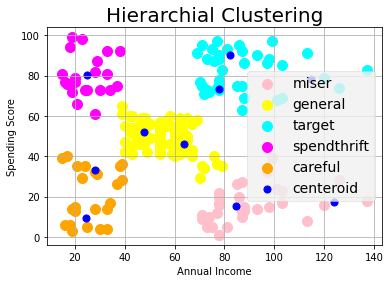

In [25]:
plt.scatter(data1[y_hc == 0, 0], data1[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(data1[y_hc == 1, 0], data1[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(data1[y_hc == 2, 0], data1[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(data1[y_hc == 3, 0], data1[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(data1[y_hc == 4, 0], data1[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
